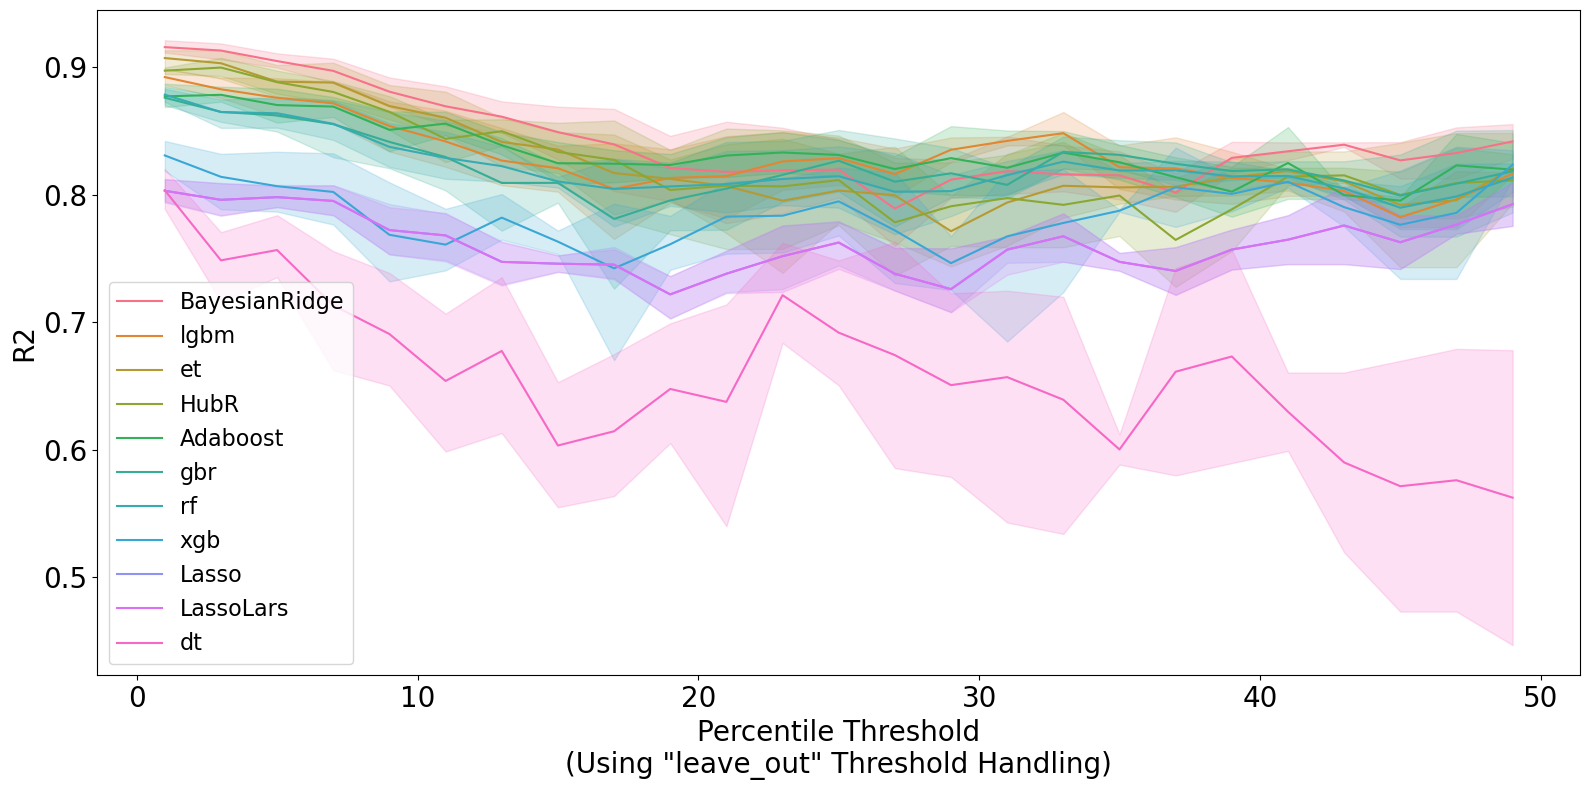

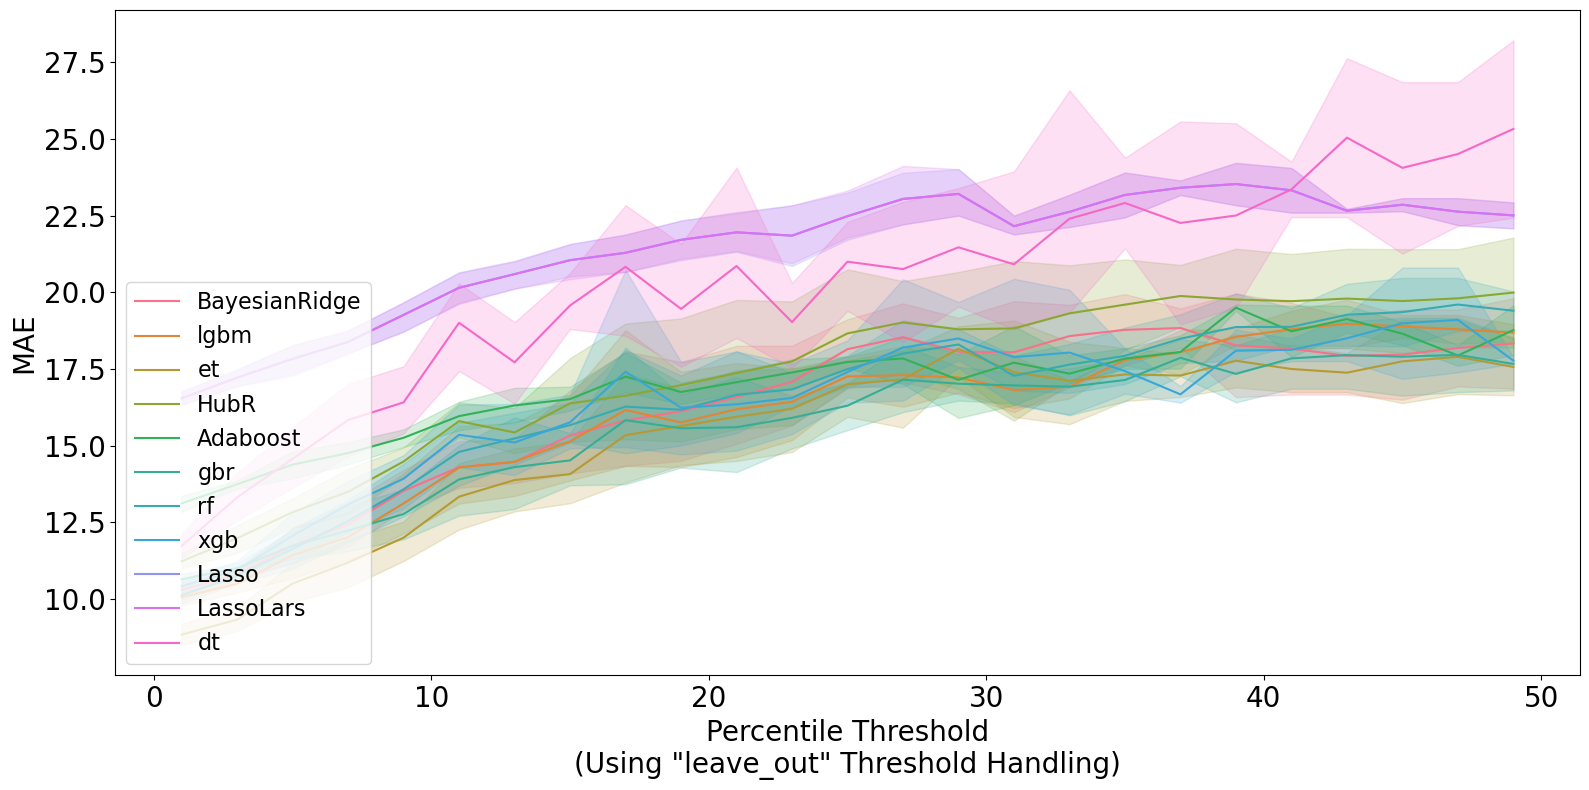

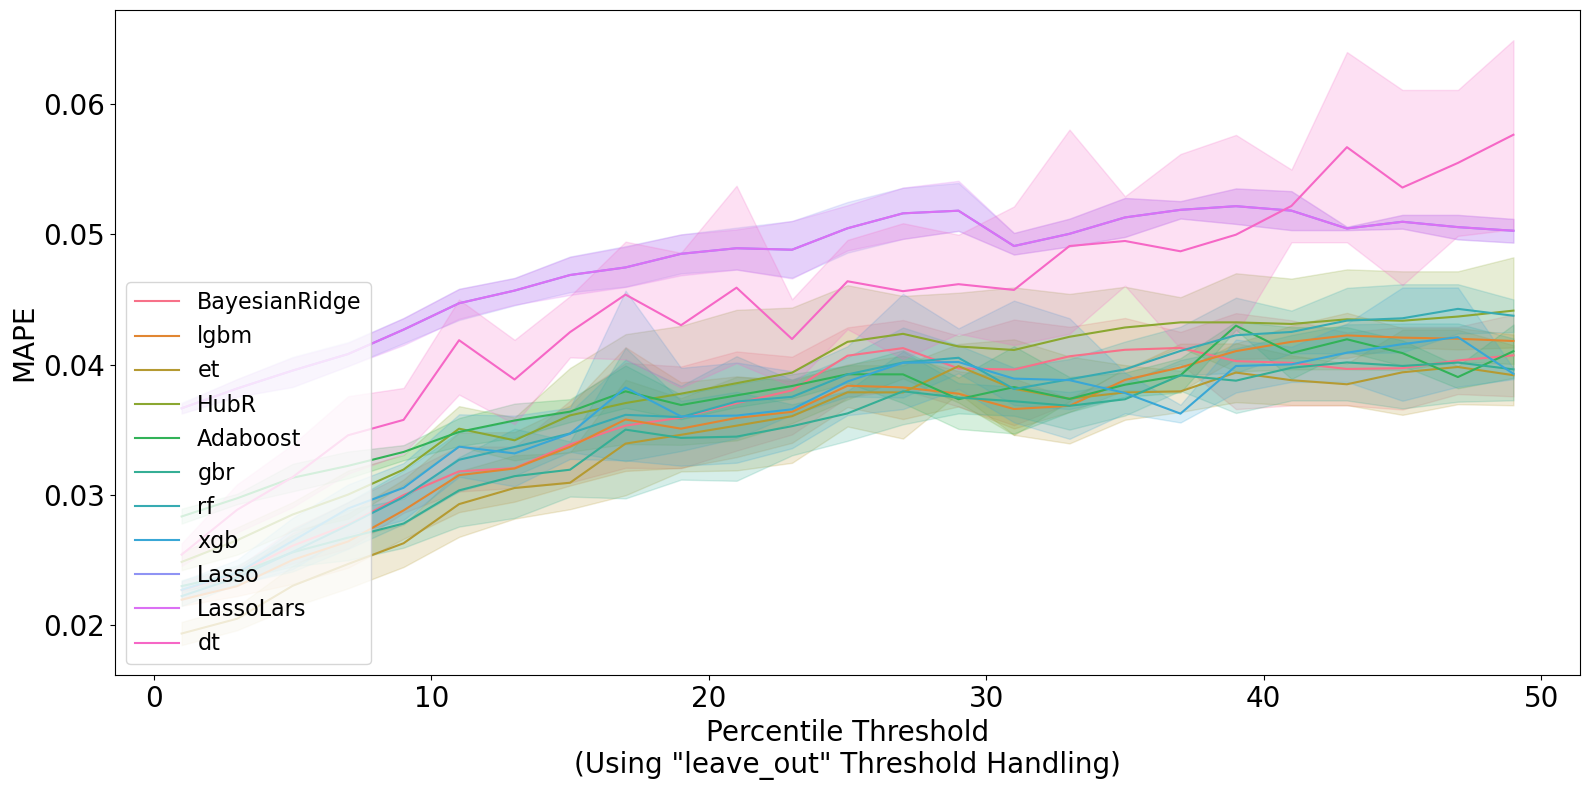

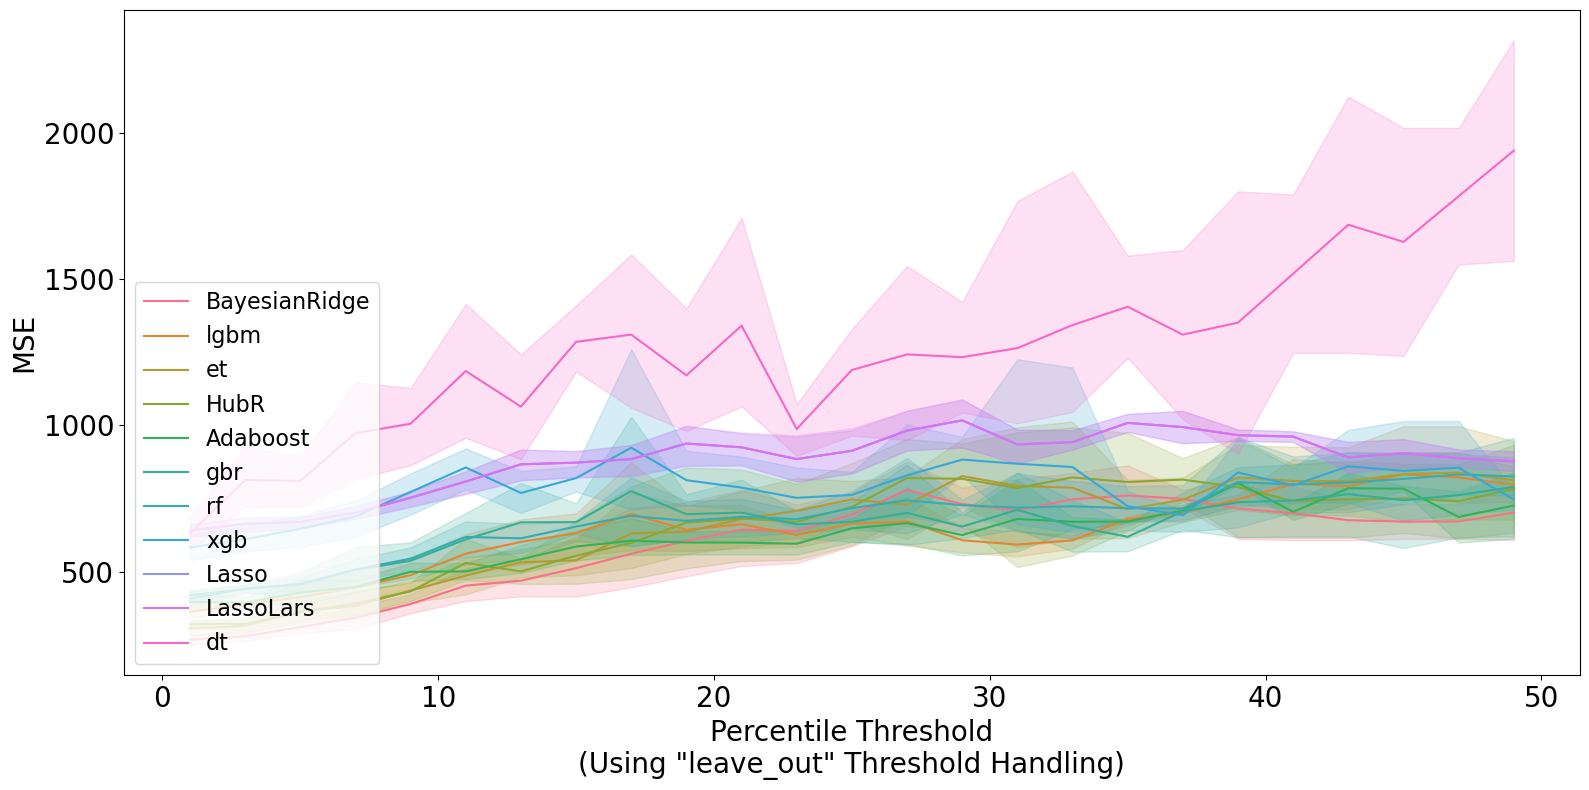

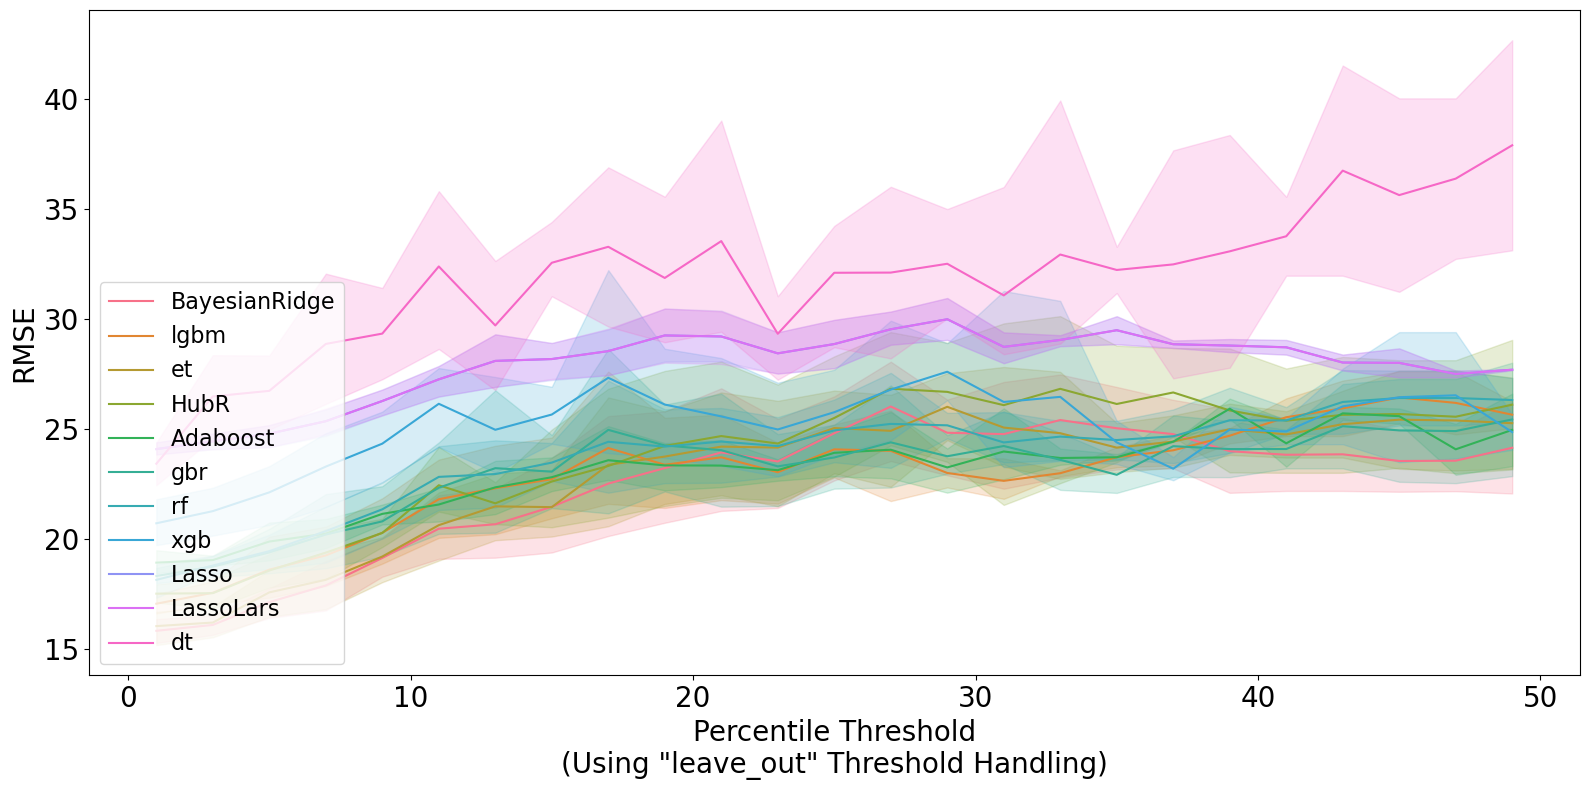

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the results file
results_df = pd.read_csv("./wt_vpod_1.2_LG_F_R7_phylo_cv_2024-08-30_10-13-35/wt_vpod_aa_enc_1.2_LG_F_R7_phylo_cv_results.csv") # Replace with your actual file name
#relation_handling_methods = ["leave_out", "max_mean", "merge"]
atts_of_intrst = ['R2', 'MAE', 'MAPE', 'MSE', 'RMSE']

for attr in atts_of_intrst:
    # Group by `Relation_Handling` and `Model`, calculate the mean of `R2`, and reset the index
    model_att = results_df[results_df['Model'] != 'lr']
    # Get unique relation handling methods
    relation_handling_methods = model_att['Relation_Handling'].unique()

    for method in relation_handling_methods:
        # Filter for 'leave_out' method and drop NaN values
        method_df = model_att[model_att['Relation_Handling'] == method].dropna(subset=attr)
        method_df = method_df[method_df['Threshold'] <= 50]

        # Create the plot using Seaborn
        plt.figure(figsize=(16, 8))  # Increase width for better clarity
        sns.lineplot(data=method_df, x='Threshold', y=attr, hue='Model')

        # Add labels and title with larger font size
        plt.xlabel(f'Percentile Threshold\n(Using "{method}" Threshold Handling)', fontsize=20)
        plt.ylabel(attr, fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        # Place the legend in the bottom left corner
        plt.legend(loc='lower left', fontsize=16)

        # Show the plot
        plt.tight_layout()

        # Save the figure as an SVG file
        plt.savefig(f'./wt_vpod_1.2_LG_F_R7_phylo_cv_2024-08-30_10-13-35/{attr}_{method}_handling_performance_trend_50_cut.svg', format='svg')  # You can change the filename if needed

        plt.show()